Practice with gradient boosting, implementation from scratch (kinda)

In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

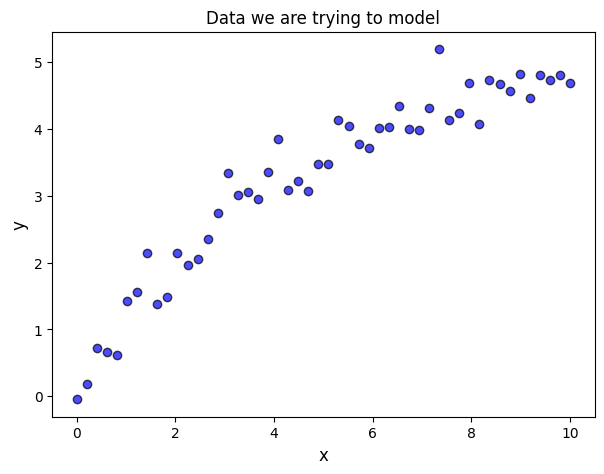

In [4]:
import matplotlib.pyplot as plt
x = np.array([0.0, 0.2041, 0.4082, 0.6122, 0.8163, 1.0204, 1.2245, 1.4286, 1.6327, 1.8367, 
     2.0408, 2.2449, 2.449, 2.6531, 2.8571, 3.0612, 3.2653, 3.4694, 3.6735, 3.8776, 
     4.0816, 4.2857, 4.4898, 4.6939, 4.898, 5.102, 5.3061, 5.5102, 5.7143, 5.9184, 
     6.1224, 6.3265, 6.5306, 6.7347, 6.9388, 7.1429, 7.3469, 7.551, 7.7551, 7.9592, 
     8.1633, 8.3673, 8.5714, 8.7755, 8.9796, 9.1837, 9.3878, 9.5918, 9.7959, 10.0])
y = np.array([-0.0448, 0.1871, 0.7216, 0.6623, 0.6178, 1.4219, 1.5576, 2.1489, 1.3759, 1.4786, 
     2.1471, 1.9579, 2.056, 2.3454, 2.7363, 3.3344, 3.0156, 3.0606, 2.9544, 3.358, 
     3.8451, 3.0791, 3.2141, 3.0676, 3.471, 3.4815, 4.1293, 4.051, 3.7693, 3.7206, 
     4.0164, 4.0335, 4.3451, 3.9977, 3.9897, 4.3185, 5.1925, 4.1358, 4.2333, 4.6896, 
     4.0778, 4.7358, 4.6766, 4.5617, 4.823, 4.4661, 4.8006, 4.7252, 4.8007, 4.6809])
plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Data", color="blue", edgecolors="black", alpha=0.7)
plt.title("Data we are trying to model")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

We will model it with: 
$$
F_m(x) = F_{m-1}(x) + \eta \sum_{i=1}^{n} h_m(x)
$$

In [5]:
# parameters
learning_rate = 0.5
n_trees = 10
max_depth = 1

In [6]:
# training
F0 = np.mean(y)
Fm = F0
trees = []
x = x.reshape(-1, 1)
for m in range(n_trees):
    hm = DecisionTreeRegressor(max_depth=max_depth)
    hm.fit(x, y - Fm)
    Fm += learning_rate * hm.predict(x)
    trees.append(hm)

y_hat = F0 + learning_rate * np.sum([t.predict(x) for t in trees], axis=0)

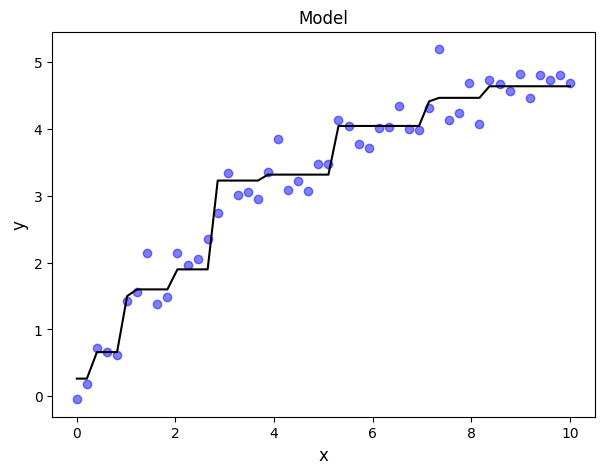

MSE:  0.05917526668918748


In [7]:
plt.figure(figsize=(7, 5))
plt.plot(x, y_hat, label="Data", color="black")
plt.scatter(x, y, label="Data", color="blue", alpha=0.5)
plt.title("Model")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()
print("MSE: ", mean_squared_error(y, y_hat))

In [8]:
# Let's compare to sklearn method
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=n_trees, learning_rate=learning_rate, max_depth=max_depth)
gbm.fit(x, y)
print("MSE: ", mean_squared_error(y, gbm.predict(x)))

MSE:  0.059175266689187475
